In [13]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Importamos el dataset
data_estimador1 = pd.read_csv("dataset_clasificador_binario.csv")

In [15]:
data_estimador1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,H,L,M
0,-0.951417,-0.946356,0.067484,0.283054,-1.695647,0,0.0,0.0,1.0
1,-0.901428,-0.878954,-0.729604,0.634238,-1.648511,0,0.0,1.0,0.0
2,-0.951417,-1.013759,-0.227940,0.945286,-1.617087,0,0.0,1.0,0.0
3,-0.901428,-0.946356,-0.590253,-0.048061,-1.585664,0,0.0,1.0,0.0
4,-0.901428,-0.878954,-0.729604,0.002108,-1.554240,0,0.0,1.0,0.0


In [16]:
corr = data_estimador1.corr()
corr

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,H,L,M
Air temperature [K],1.000000,0.876068,0.023332,-0.014553,0.014370,0.083066,-0.023176,0.006691,0.008024
Process temperature [K],0.876068,1.000000,0.020200,-0.015275,0.013970,0.035997,-0.018247,0.005240,0.006349
Rotational speed [rpm],0.023332,0.020200,1.000000,-0.875069,-0.000110,-0.044042,-0.000960,0.004718,-0.004415
Torque [Nm],-0.014553,-0.015275,-0.875069,1.000000,-0.002552,0.193420,-0.005080,0.000955,0.002306
Tool wear [min],0.014370,0.013970,-0.000110,-0.002552,1.000000,0.106337,-0.001177,0.006970,-0.006680
Target,0.083066,0.035997,-0.044042,0.193420,0.106337,1.000000,-0.024327,0.037754,-0.024431
H,-0.023176,-0.018247,-0.000960,-0.005080,-0.001177,-0.024327,1.000000,-0.408425,-0.218256
L,0.006691,0.005240,0.004718,0.000955,0.006970,0.037754,-0.408425,1.000000,-0.801645
M,0.008024,0.006349,-0.004415,0.002306,-0.006680,-0.024431,-0.218256,-0.801645,1.000000


## Medidas de correlación y Fisher

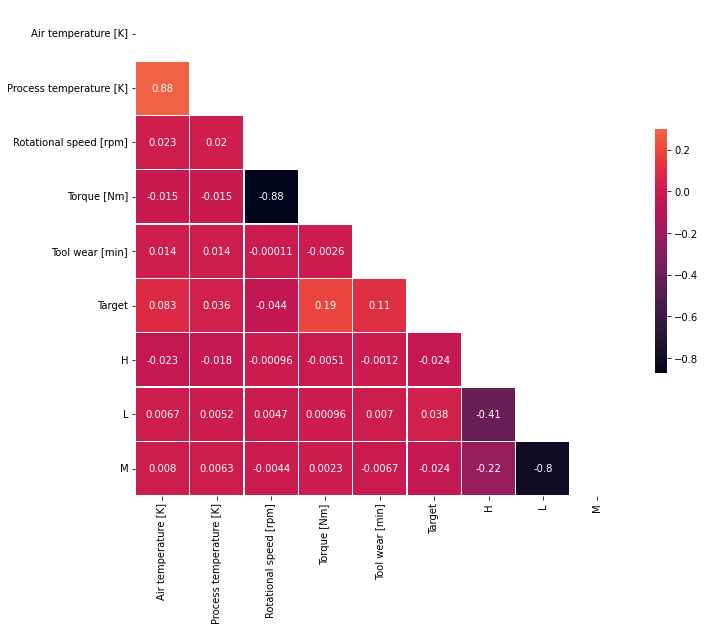

In [17]:
# Genera una mascara para el triangulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = "rocket"
# Se dibuja el heatmap para el gráfico de correlación
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
idx = 0
fisher = pd.DataFrame()
for var in data_estimador1.columns:
  if var == "Target": continue
  X = data_estimador1[data_estimador1["Target"] == 0][var]
  X2 = data_estimador1[data_estimador1["Target"] == 1][var]
  fish = abs((X.mean()-X2.mean())**2/(X.std()**2 - X2.std()**2))
  fisher.loc[idx, "Característica"] = var
  fisher.loc[idx, "Discriminante de fisher"] = fish
  idx += 1
fisher

,Característica,Discriminante de fisher
0,Air temperature [K],2.581443
1,Process temperature [K],0.265628
2,Rotational speed [rpm],0.015770
3,Torque [Nm],0.640951
4,Tool wear [min],1.053279
5,H,0.048940
6,L,0.355739
7,M,0.139041


# Análisis para problema multiclase

In [19]:
data_estimador2 = pd.read_csv("dataset_clasificador_multiclase.csv")
data_estimador2.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,H,L,M
0,-0.551506,-0.609342,7.369473,-3.549861,0.551157,2.0,0.0,1.0,0.0
1,-0.551506,-0.676745,-0.718456,2.580797,1.305329,2.0,0.0,1.0,0.0
2,-0.601495,-0.744148,-0.467624,0.132547,1.572432,3.0,0.0,1.0,0.0
3,-0.801450,-1.215968,-1.431932,2.079106,1.698127,1.0,0.0,1.0,0.0
4,-0.851439,-1.283370,-0.707308,1.236266,1.729551,1.0,0.0,1.0,0.0


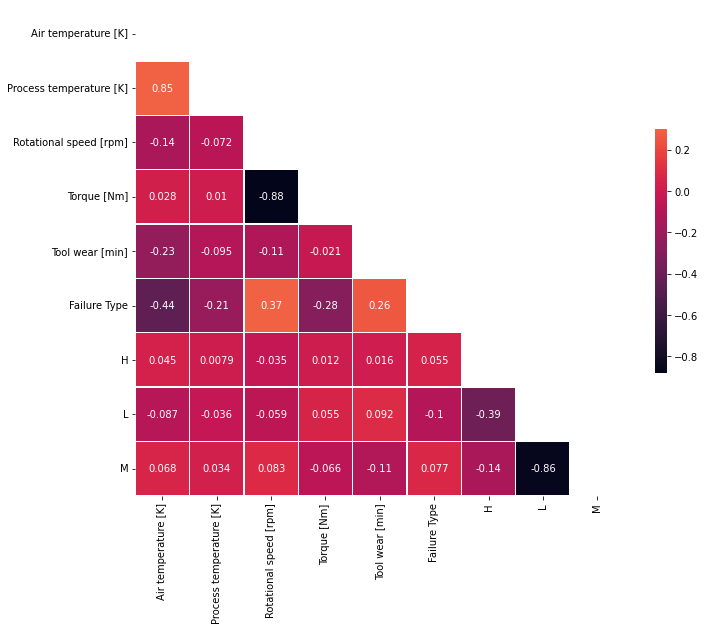

In [20]:
corr = data_estimador2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = "rocket"
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0, 0.5, 'Process temperature [K]')

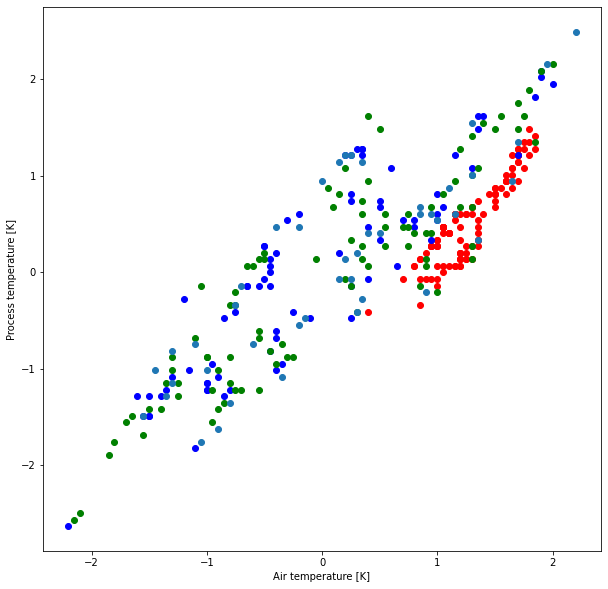

In [21]:
x, y  = data_estimador2[data_estimador2["Failure Type"] == 0]["Air temperature [K]"], data_estimador2[data_estimador2["Failure Type"] == 0]["Process temperature [K]"]
x2, y2  = data_estimador2[data_estimador2["Failure Type"] == 1]["Air temperature [K]"], data_estimador2[data_estimador2["Failure Type"] == 1]["Process temperature [K]"]
x3, y3  = data_estimador2[data_estimador2["Failure Type"] == 2]["Air temperature [K]"], data_estimador2[data_estimador2["Failure Type"] == 2]["Process temperature [K]"]
x4, y4  = data_estimador2[data_estimador2["Failure Type"] == 3]["Air temperature [K]"], data_estimador2[data_estimador2["Failure Type"] == 3]["Process temperature [K]"]
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x,y,'ro')
ax.plot(x2,y2,'bo')
ax.plot(x3,y3,'go')
ax.plot(x4,y4,'o')
ax.set_xlabel('Air temperature [K]')
ax.set_ylabel('Process temperature [K]')

Text(0, 0.5, 'Torque [Nm]')

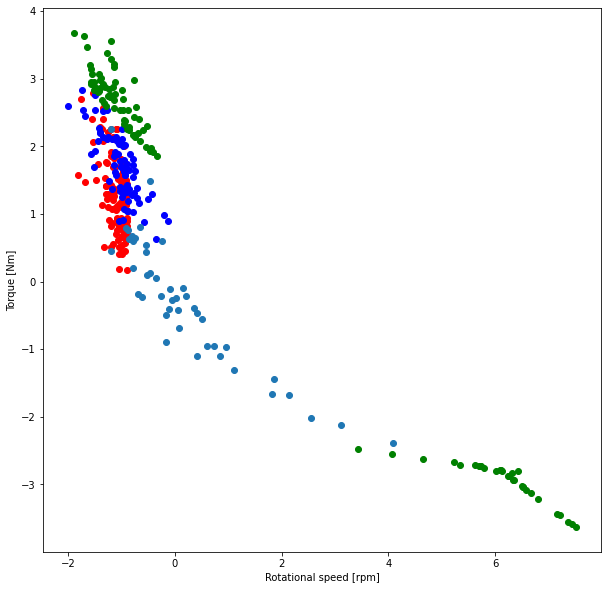

In [22]:
x, y  = data_estimador2[data_estimador2["Failure Type"] == 0]["Rotational speed [rpm]"], data_estimador2[data_estimador2["Failure Type"] == 0]["Torque [Nm]"]
x2, y2  = data_estimador2[data_estimador2["Failure Type"] == 1]["Rotational speed [rpm]"], data_estimador2[data_estimador2["Failure Type"] == 1]["Torque [Nm]"]
x3, y3  = data_estimador2[data_estimador2["Failure Type"] == 2]["Rotational speed [rpm]"], data_estimador2[data_estimador2["Failure Type"] == 2]["Torque [Nm]"]
x4, y4  = data_estimador2[data_estimador2["Failure Type"] == 3]["Rotational speed [rpm]"], data_estimador2[data_estimador2["Failure Type"] == 3]["Torque [Nm]"]
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x,y,'ro')
ax.plot(x2,y2,'bo')
ax.plot(x3,y3,'go')
ax.plot(x4,y4,'o')
ax.set_xlabel('Rotational speed [rpm]')
ax.set_ylabel('Torque [Nm]')

Text(0, 0.5, 'Torque [Nm]')

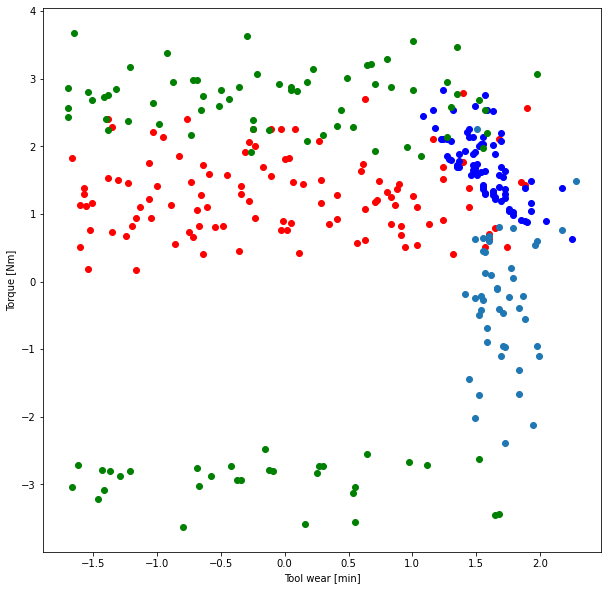

In [23]:
x, y  = data_estimador2[data_estimador2["Failure Type"] == 0]["Tool wear [min]"], data_estimador2[data_estimador2["Failure Type"] == 0]["Torque [Nm]"]
x2, y2  = data_estimador2[data_estimador2["Failure Type"] == 1]["Tool wear [min]"], data_estimador2[data_estimador2["Failure Type"] == 1]["Torque [Nm]"]
x3, y3  = data_estimador2[data_estimador2["Failure Type"] == 2]["Tool wear [min]"], data_estimador2[data_estimador2["Failure Type"] == 2]["Torque [Nm]"]
x4, y4  = data_estimador2[data_estimador2["Failure Type"] == 3]["Tool wear [min]"], data_estimador2[data_estimador2["Failure Type"] == 3]["Torque [Nm]"]
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x,y,'ro')
ax.plot(x2,y2,'bo')
ax.plot(x3,y3,'go')
ax.plot(x4,y4,'o')
ax.set_xlabel('Tool wear [min]')
ax.set_ylabel('Torque [Nm]')

In [24]:
idx = 0
fisher = pd.DataFrame()
for var in data_estimador2.columns:
  if var == "Failure Type": continue
  fisher.loc[idx, "Característica"] = var
  for clss1 in data_estimador2["Failure Type"].unique():
    i = 0
    for ic in range(i, len(data_estimador2["Failure Type"].unique())):
      clss2 = data_estimador2["Failure Type"].unique()[i]
      if clss1 == clss2: continue
      niu1 = data_estimador2[data_estimador2["Failure Type"] == clss1][var].mean()
      niu2 = data_estimador2[data_estimador2["Failure Type"] == clss2][var].mean()
      std1 = data_estimador2[data_estimador2["Failure Type"] == clss1][var].std()
      std2 = data_estimador2[data_estimador2["Failure Type"] == clss2][var].std()
      fish = abs((niu1-niu2)**2/(std1**2 - std2**2))
      fisher.loc[idx, "Clase"+str(int(clss1)+1)+" vs "+"Clase"+str(int(clss2)+1)] = fish
      i += 1
  idx += 1
fisher

,Característica,Clase4 vs Clase3,Clase2 vs Clase3,Clase2 vs Clase4,Clase1 vs Clase3,Clase1 vs Clase4,Clase1 vs Clase2
0,Air temperature [K],0.061287,0.054554,3.482390,1.463030,1.482250,2.111036
1,Process temperature [K],0.142277,0.062215,0.080398,0.332306,0.219341,0.280227
2,Rotational speed [rpm],0.108914,0.439608,1.207258,0.472299,1.315224,0.111623
3,Torque [Nm],0.203180,0.100850,5.811773,0.026591,4.275761,1.700663
4,Tool wear [min],3.295923,2.874953,1.225058,3.228171,2.982906,2.581490
5,H,0.096073,0.042184,0.137843,0.021372,0.074763,0.063488
6,L,0.292319,0.559796,0.754409,0.134916,0.419915,0.457785
7,M,0.077564,0.437528,0.397340,0.140657,0.087772,0.315661
